<a href="https://colab.research.google.com/github/smnieee/ml_workshop/blob/master/session5/1_FunWithNeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fun with Neural Networks

---

## Southern Minnesota IEEE: Machine Learning Workshop 5
## May 16, 2022

In [80]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers

## Simple Perceptron Example (Classification)

The perceptron is the basic unit of the neural network. It takes multiple inputs and produces one output. The inputs are adjusted with weights, $w$, and biases, $b$. The output is a result of an activation function being applied to the sum of the adjusted inputs.

In [81]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [82]:
# Load data and view them
iris = load_iris()

iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

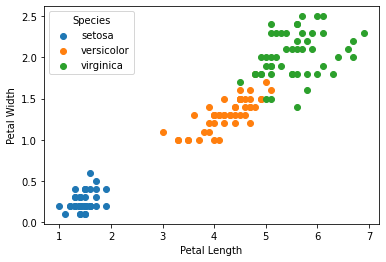

In [83]:
# Let's look at petal length and width
X = iris.data[:, 2:4]

# Plot the data
fig, ax = plt.subplots()
for lbl,name in enumerate(iris.target_names):
  ax.scatter(X[(iris.target==lbl),0], X[(iris.target==lbl),1],
             label=name)

ax.legend(title='Species')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
plt.show()

In [84]:
# Binary targets: it's either Setosa or not
y = (iris.target == 0).astype(int)

In [85]:
# Create a Perceptron from Scikit-Learn and use it to predict setosa
is_setosa = Perceptron()
is_setosa.fit(X,y)

y_pred = is_setosa.predict([[3.,1.]])
y_pred.astype(bool)

array([False])

## Linear Regression Example

The petal length versus width appears to be linear. This can also be approximated with a simple network.

Coefficient:  [[0.41575542]]
Intercept:  [-0.36307552]


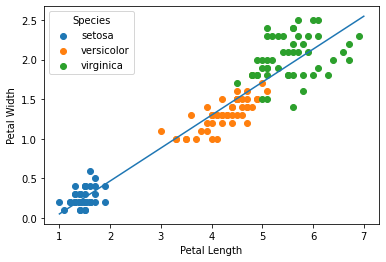

In [86]:
from sklearn import linear_model
petal_regression = linear_model.LinearRegression()

x_linreg = X[:,0].reshape(-1,1)
y_linreg = X[:,1].reshape(-1,1)

petal_regression.fit(x_linreg,y_linreg)

new_X = np.linspace(1,7).reshape(-1,1)
new_Y = petal_regression.predict(new_X)

print("Coefficient: ", petal_regression.coef_)
print("Intercept: ", petal_regression.intercept_)

# Plot the data
fig, ax = plt.subplots()
for lbl,name in enumerate(iris.target_names):
  ax.scatter(X[(iris.target==lbl),0], X[(iris.target==lbl),1],
             label=name)

ax.legend(title='Species')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

ax.plot(new_X, new_Y)
plt.show()


## Full Classification Example (Keras)

A neural network comprises many artificial neurons like the perceptron. The neurons are orgainized by layer. The outputs from one layer are appropriately modified and passed as inputs to the next layer. Each layer is optimized using techniques such as gradient descent.



Train Image Array Shape:  (60000, 28, 28)
Train Label Array Shape:  (60000,)


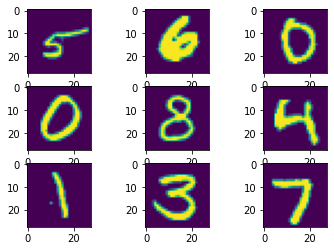

In [136]:
import sklearn
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Rescale the data
X_train_full = X_train_full /255.0 
y_train_full = y_train_full / 255.0 
X_test = X_test / 255.0 
y_test = y_test / 255.0 

print("Train Image Array Shape: ", np.shape(X_train_full))
print("Train Label Array Shape: ", np.shape(y_train_full))

#---
# View the Test Data Here
#---

img_samples = np.random.randint(0, high=len(X_train_full), size=9)

fig,ax = plt.subplots(3,3)

for n in range(9):
  ind = np.unravel_index(n, (3,3))
  img = X_train_full[img_samples[n]]
  ax[ind].imshow(img)

plt.show()

In [130]:
from sklearn.model_selection import train_test_split

TRAIN_SPLIT = 0.66
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  train_size=TRAIN_SPLIT)

# CHECK the size of the arrays like above


### Build the Keras Model

The Sequential model is a common model to start with. It assumes a linear sequence of layers like a pipline.

In [139]:
# Create an instance of the model to build on
model = keras.models.Sequential([
  # Add the input layer. In this scenario we will just flatten the image array
  keras.layers.Flatten(input_shape=[28,28]),
  # Change the size of the first layer
  keras.layers.Dense( 300, activation='relu'),
  #Try More layers
  keras.layers.Dense(10, activation='softmax')
])

### Review the model

It is important to look at your model after building it. Some useful functions are `model.summary()` and `model.layers`.

In [140]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [143]:
for l in model.layers:
  print(l.name, " weights: ", l.get_weights())

flatten_1  weights:  []
dense_2  weights:  [array([[ 0.01235942,  0.06640832, -0.03535594, ...,  0.02218101,
        -0.06762867,  0.04931583],
       [-0.04247702, -0.00752693,  0.05345863, ..., -0.00912352,
        -0.06572643, -0.02037535],
       [-0.05068287,  0.04865623,  0.00770257, ...,  0.03368135,
        -0.07191508, -0.05381608],
       ...,
       [-0.0628841 ,  0.00203888, -0.04890215, ...,  0.00831627,
         0.06184739,  0.00391573],
       [-0.00906406, -0.05257007,  0.01855447, ..., -0.00089878,
        -0.05637714,  0.00448778],
       [ 0.05964394, -0.01645798,  0.02616243, ...,  0.00187292,
        -0.03752936,  0.07351264]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 

### Compile the Model

In Keras / Tensorflow, you compile the model before using it.

In [144]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Train the Model

Next you need to train the model on our training data.

In [146]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10,
                    validation_batch_size=10, validation_data=(X_val, y_val))

Epoch 1/10
3960/3960 [==============================] - 18s 5ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3052 - val_accuracy: 0.1140
Epoch 2/10
3960/3960 [==============================] - 19s 5ms/step - loss: 2.3013 - accuracy: 0.1116 - val_loss: 2.3057 - val_accuracy: 0.1140
Epoch 3/10
3960/3960 [==============================] - 15s 4ms/step - loss: 2.3015 - accuracy: 0.1113 - val_loss: 2.3051 - val_accuracy: 0.1140
Epoch 4/10
3960/3960 [==============================] - 14s 3ms/step - loss: 2.3014 - accuracy: 0.1116 - val_loss: 2.3051 - val_accuracy: 0.1140
Epoch 5/10
3960/3960 [==============================] - 14s 4ms/step - loss: 2.3014 - accuracy: 0.1116 - val_loss: 2.3053 - val_accuracy: 0.1140
Epoch 6/10
3960/3960 [==============================] - 14s 4ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3051 - val_accuracy: 0.1140
Epoch 7/10
3960/3960 [==============================] - 16s 4ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3051 - val_ac

### Evaluate the Model on Test Data

In [147]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3460 - accuracy: 0.0000e+00


[2.3459630012512207, 0.0]

---

## References

Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2019.

